## Analyze Dataset

### Setup

In [13]:
import pandas as pd
import matplotlib

In [14]:
def get_data_root_dir():
    return "../../data/eas_attestations"

### Look at common schema ids

In [27]:
# Read the enriched attestation events
df = pd.read_json(f"{get_data_root_dir()}/enriched_attestation_events.jsonl",lines=True)
print(f'Number of enriched attestation events: {len(df)}')
#df['schema'].value_counts().plot(kind='bar')

# Log top 10 schemas
print(df['schema'].value_counts().head(10))

ValueError: Value is too big!

### Analyse github filtered data

Number of filtered attestation events: 1645
schema
0x16bfe4783b7a9c743c401222c56a07ecb77ed42afc84b61ff1f62f5936c0b9d7    1313
0x0bb47b41b94edf42a307f0a7958e00d8c8f345e574c6698922e8c756d9c261dc     153
0xd25ccdfbf87659a9081681eb90598d8b944ed28544da7d57c3ccbe6e6422cc15      71
0x489ee9da397c5de3feaf9e4ec0e55b876bb8b5c2d64497caf7ac95a90cc250a2      59
0xb2c86dba2ae6850162914ba13ccfb7ac51dd0cbdf96cac38ec41386bad3a3720      20
0x93391c496898c63995f23797835c8e0468be338f0dbc2df62edfd70856cde1d4      18
0x951fa7e07d6e852eb4535331db373786f5ab7249bb31d94cc4bd05250ebb6500       6
0x44d562ac1d7cd77e232978687fea027ace48f719cf1d58c7888e509663bb87fc       1
0x3dde57604415eece2459e1dbc213159259351b48b0aaa9291ada4a84d26f00bb       1
0xf58b8b212ef75ee8cd7e8d803c37c03e0519890502d5e99ee2412aae1456cafe       1
Name: count, dtype: int64


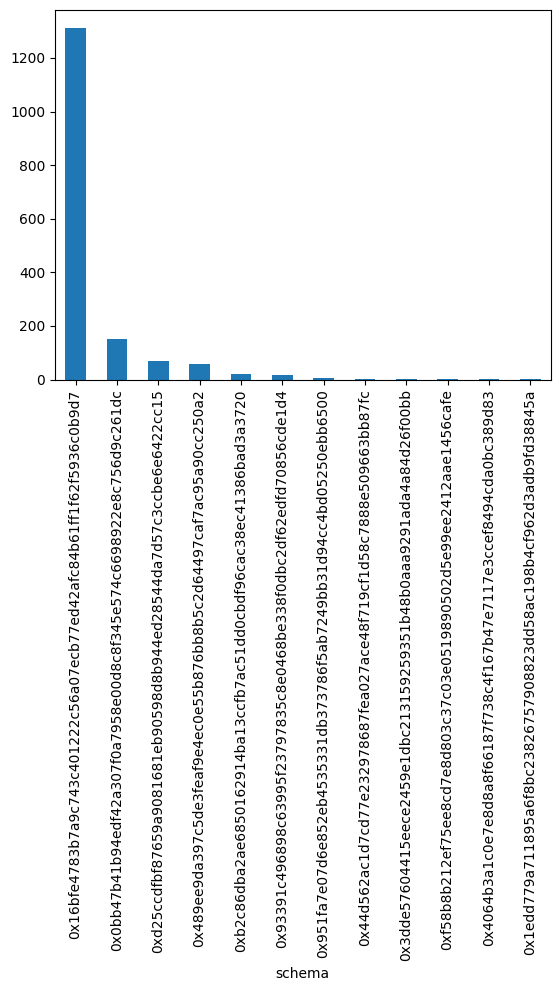

In [29]:
# Read the filtered attestation events
df = pd.read_json(f"{get_data_root_dir()}/filtered_attestation_with_github.jsonl", lines=True)
print(f'Number of filtered attestation events: {len(df)}')
df['schema'].value_counts().plot(kind='bar')

# Log top 10 schemas
print(df['schema'].value_counts().head(10))

In [ ]:
# Read the filtered attestation events
df = pd.read_json("./eas_attestations/filtered_attestation_events.jsonl", lines=True)

# Filter for /github.com\/any_word pattern
# More flexible pattern that handles various repository names
df_filtered = df[df['decoded_data'].apply(lambda x: str(x)).str.contains(r'github\.com\/[^\/\s]+')]

# For each, add a field githubLink with string matching the pattern r'github\.com\/[^\/\s]+'
df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/([^\/\s]+)')

# Log top 10 githubLink
print(f'Number of attestations containing github url: {len(df_filtered)}')
print(f'Number of unique github links: {len(df_filtered["githubLink"].unique())}')
print(df_filtered['githubLink'].value_counts().head(10))

Number of attestations containing github url: 2500
Number of unique github links: 1153
githubLink
orgs                   48
greenpill-dev-guild    33
Panmoni                24
AtlantisDAO1           23
Panmoni',              22
peeramid-labs          20
svanas                 16
MesoReefDAO            15
Super-DCA-Tech         15
lil-org                14
Name: count, dtype: int64


/var/folders/hd/mwwk_4zs7blcj6tc0ycm9t5c0000gn/T/ipykernel_10672/629551922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/([^\/\s]+)')


In [ ]:
# Read the filtered attestation events
df = pd.read_json("./eas_attestations/filtered_attestation_events.jsonl", lines=True)

# Filter for /github.com\/any_word pattern
# More flexible pattern that handles various repository names
df_filtered = df[df['decoded_data'].apply(lambda x: str(x)).str.contains(r'github\.com\/orgs\/[^\/\s]+')]

# For each, add a field githubLink with string matching the pattern r'github\.com\/[^\/\s]+'
df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/orgs\/([^\/\s]+)')

# Log top 10 githubLink
print(f'Number of attestations containing github url: {len(df_filtered)}')
print(f'Number of unique github links: {len(df_filtered["githubLink"].unique())}')
print(df_filtered['githubLink'].value_counts().head(10))

Number of attestations containing github url: 59
Number of unique github links: 30
githubLink
greenpill-dev-guild         8
Kingfishers-Media-LLC',     5
fractaldotbox               4
deScier                     3
Kingfishers-Media-LLC'},    3
Eppie-io                    3
Hydrafront                  2
builders-garden             2
AERTHCODE                   2
Treegens                    2
Name: count, dtype: int64


/var/folders/hd/mwwk_4zs7blcj6tc0ycm9t5c0000gn/T/ipykernel_10672/619376035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['githubLink'] = df_filtered['decoded_data'].apply(lambda x: str(x)).str.extract(r'github\.com\/orgs\/([^\/\s]+)')


### Look at other string filters

In [16]:
import json

def filter_attestations_by_string(inputString):

    in_path = f"{get_data_root_dir()}/enriched_attestation_events.jsonl"
    out_path = f"{get_data_root_dir()}/filtered_attestation_with_{inputString}.jsonl"

    total = 0
    with open(in_path, "r") as fin, open(out_path, "w") as fout:
        for line in fin:
            if not line.strip():
                continue
            try:
                obj = json.loads(line)
            except json.JSONDecodeError:
                continue
            if "decoded_data" in obj and inputString in str(obj["decoded_data"]).lower():
                fout.write(json.dumps(obj) + "\n")
                total += 1

    print(f"Found {total} attestations containing '{inputString}'")


In [ ]:
filter_attestations_by_string("contribution")

Found 645 attestations containing 'contribution'


In [ ]:
filter_attestations_by_string("repo")

Found 709 attestations containing 'repo'


Found 3609 attestations containing 'hackathon'
Number of filtered attestation events: 3609
schema
0x951fa7e07d6e852eb4535331db373786f5ab7249bb31d94cc4bd05250ebb6500    1735
0x364a59df1d48d4b6c0f8f0c1176504b252bce5ce57e0d1ca75b1bf70c2f0ec14    1524
0x16bfe4783b7a9c743c401222c56a07ecb77ed42afc84b61ff1f62f5936c0b9d7     277
0x8c9869749033d77b67d16dc5b6fe9b7a701a2794cdf597bc3f1c079af69a1eef      64
0xdeccfaae7507ad848a2f91372446968266899149449f862513efe8f5d74b18ba       3
0x44d562ac1d7cd77e232978687fea027ace48f719cf1d58c7888e509663bb87fc       2
0x93391c496898c63995f23797835c8e0468be338f0dbc2df62edfd70856cde1d4       2
0x3969bb076acfb992af54d51274c5c868641ca5344e1aacd0b1f5e4f80ac0822f       1
0xd25ccdfbf87659a9081681eb90598d8b944ed28544da7d57c3ccbe6e6422cc15       1
Name: count, dtype: int64


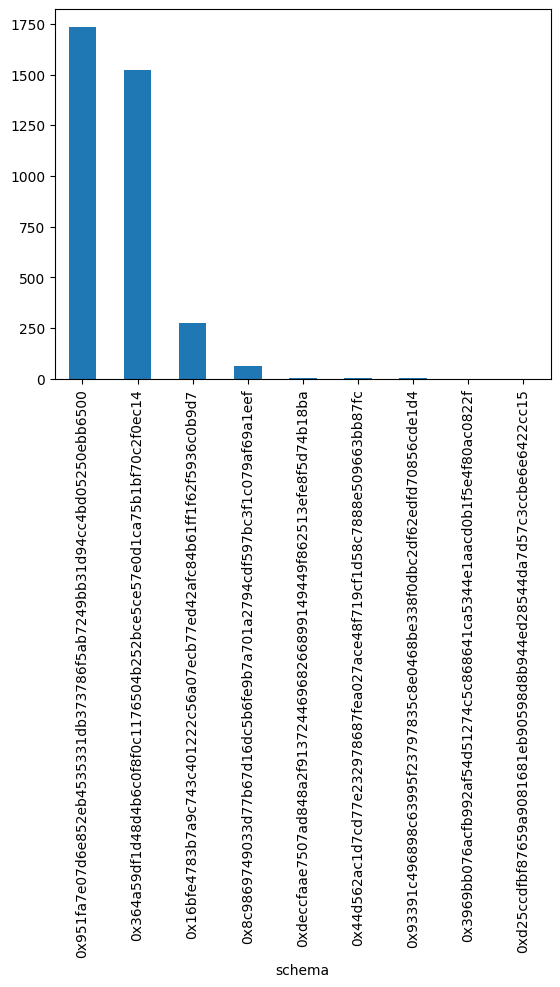

In [30]:
filter_attestations_by_string("hackathon")
# Read the filtered attestation events
df = pd.read_json(f"{get_data_root_dir()}/filtered_attestation_with_hackathon.jsonl", lines=True)
print(f'Number of filtered attestation events: {len(df)}')
df['schema'].value_counts().plot(kind='bar')

# Log top 10 schemas
print(df['schema'].value_counts().head(10))